In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [20]:
train = pd.read_csv('./train0611.csv')
test = pd.read_csv('./test0611.csv')

In [21]:
train.head()

,g1,g2,g1t,g2t,pd1,pd2,cont,dic,identity,label,t1,t2,score
0,6788.0,6793.0,disease_resistance,disease_resistance,P0DKH6,Q9CAK1,7,2,44.696,1.0,2014-11-26,2015-06-24,625.744
1,6805.0,6793.0,disease_resistance,disease_resistance,F4KHI3,Q9CAK1,7,2,41.778,1.0,2014-07-09,2015-06-24,584.892
2,6794.0,6793.0,disease_resistance,disease_resistance,F4I594,Q9CAK1,8,2,60.079,1.0,2015-06-24,2015-06-24,961.264
3,6803.0,6793.0,disease_resistance,disease_resistance,Q9C7X0,Q9CAK1,8,2,53.724,1.0,2015-06-24,2015-06-24,859.584
4,6731.0,6793.0,disease_resistance,disease_resistance,F4JNA9,Q9CAK1,8,2,41.518,1.0,2015-06-24,2015-06-24,664.288


In [22]:
test.head()

,g1,g2,g1t,g2t,pd1,pd2,cont,dic,identity,label,t1,t2,score
0,6713.0,6793.0,disease_resistance,disease_resistance,F4JWM0,Q9CAK1,7,2,44.678,1.0,2017-11-22,2015-06-24,625.492
1,6713.0,6726.0,disease_resistance,disease_resistance,F4JWM0,O82500,6,2,42.137,1.0,2017-11-22,2006-11-28,505.644
2,6674.0,6726.0,disease_resistance,disease_resistance,F4JT82,O82500,5,2,48.276,1.0,2018-06-20,2006-11-28,482.760
3,6677.0,6726.0,disease_resistance,disease_resistance,F4JT78,O82500,6,2,51.667,1.0,2018-06-20,2006-11-28,620.004
4,6713.0,6774.0,disease_resistance,disease_resistance,F4JWM0,Q9FI14,8,2,50.749,1.0,2017-11-22,2015-06-24,811.984


In [23]:
train['score1']=train['score']/train['score'].max()
test['score1']=test['score']/test['score'].max()

In [24]:
scores = []
macro_avg =[]

for score in train['score'].sort_values().values:
    train['label1']=0
    train['label1'][train['score']>=score]=1
    a =classification_report(train['label'], train['label1'],output_dict=True)
    scores.append(score)
    macro_avg.append(a['macro avg']['f1-score'])

In [25]:
data = pd.DataFrame({'id':np.arange(len(train)),"scores":scores,"macro_avg":macro_avg})
data.head()

,id,scores,macro_avg
0,0,144.040,0.479256
1,1,292.408,0.478883
2,2,293.128,0.478510
3,3,294.544,0.478136
4,4,301.920,0.477762


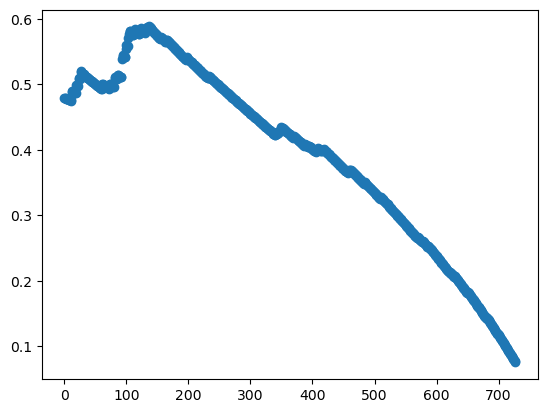

In [27]:
x=data['id']
y=data['macro_avg']
plt.scatter(x, y)
plt.show()

In [28]:
np.argmax(macro_avg)

137

In [29]:
max(macro_avg)

0.5884747554850647

In [32]:
threshold = scores[np.argmax(macro_avg)]
threshold

502.36

In [33]:
train['label1']=0
train['label1'][train['score']>=threshold]=1
print(classification_report(train['label'], train['label1']))

              precision    recall  f1-score   support

         0.0       0.20      0.48      0.29        58
         1.0       0.95      0.84      0.89       670

    accuracy                           0.81       728
   macro avg       0.58      0.66      0.59       728
weighted avg       0.89      0.81      0.84       728



In [34]:
test['label1']=0
test['label1'][test['score']>=threshold]=1
print(classification_report(test['label'], test['label1']))

              precision    recall  f1-score   support

         0.0       0.38      0.19      0.25        16
         1.0       0.91      0.96      0.94       141

    accuracy                           0.89       157
   macro avg       0.64      0.58      0.59       157
weighted avg       0.86      0.89      0.87       157

